In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Load 2013 Power Data

In [4]:
data = pd.read_csv('../data/2013-complete.csv')
data = data.astype({'datetime': 'datetime64'}) # convert datatime column

## Load 2013 Weather Data

In [5]:
weather = pd.read_csv('../data/openweather-london-2013.csv')
weather = weather.astype({'datetime': 'datetime64'})

## Calculate Daily Power Usage

In [40]:
pdailys = pd.DataFrame()
grouped = data.groupby(['year', 'month', 'day'])

pdailys['sigma'] = grouped['sigma'].sum()
for name in data.columns:
    if name.endswith('_sigma'):
        pdailys[name] = grouped[name].sum()

# reset indicies
pdailys = dailys.reset_index()

# get dates 
pdates = grouped['datetime'].apply(lambda x: x.iloc[0])

### Examine Daily Power Usage

In [50]:
# preview daily totals
pdailys.head()

,index,year,month,day,sigma,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,J_sigma,K_sigma,L_sigma,M_sigma,N_sigma,O_sigma,P_sigma,Q_sigma,U_sigma,datetime
0,0,2013,1,1,52915.509002,2845.940999,271.051,1856.797000,3317.465998,14674.021998,5873.765999,1965.495000,4859.790998,471.827000,1155.351002,1623.573002,3257.924001,1246.667001,1311.814001,853.918000,682.998001,6145.150001,501.958000,2013
1,1,2013,1,2,53762.278998,2825.640001,306.085,1840.583001,3515.687001,15379.707997,5781.865999,1930.780001,4887.100998,458.130000,1196.351000,1621.809000,3149.738000,1210.401001,1352.050999,872.318000,665.138000,6085.554000,683.339001,2013
2,2,2013,1,3,50936.101000,2620.969001,242.153,1687.588002,3169.053000,14518.183997,5583.304999,1861.566999,4589.428999,426.764000,1133.019003,1544.590000,3022.740001,1170.218999,1266.323000,812.341000,694.536999,5951.992001,641.328000,2013
3,3,2013,1,4,50665.110001,2608.124000,265.449,1700.677000,3319.497998,14349.022002,5555.364000,1807.068001,4576.034001,453.964000,1089.012001,1552.909000,3026.859000,1118.805000,1283.730000,800.163000,733.992999,5806.534999,617.904001,2013
4,4,2013,1,5,52546.436998,2838.917000,264.141,1646.641999,3446.461000,14807.590002,5732.511000,1822.690000,4782.427998,491.035999,1156.581999,1587.144000,3160.975001,1173.191999,1346.733000,911.268001,726.162999,6069.790001,582.173999,2013


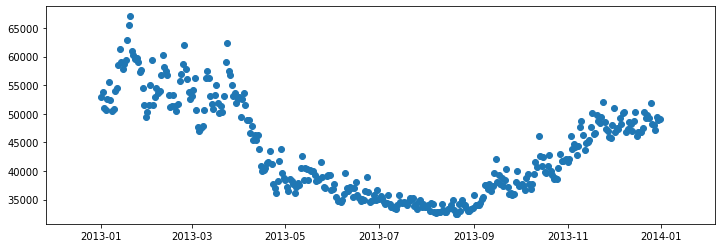

In [58]:
plt.figure(figsize=(12,4))
plt.scatter(pdates, dailys['sigma'])

## Calculate Average Daily Temperature 

In [49]:
wdailys = pd.DataFrame()
grouped = weather.groupby(['year','month','day'])
wdailys['mean'] = grouped['temp'].mean()
wdates = grouped['Tempuraturedatetime'].apply(lambda x : x.iloc[0])

### Examine Mean Deaily Temperature

In [53]:
wdailys.head()

mean
year month day           
2013 1     1    47.555375
           2    39.655250
           3    39.050750
           4    47.201750
           5    44.951898

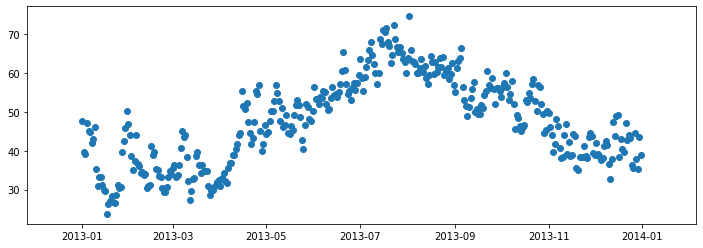

In [59]:
plt.figure(figsize=(12,4))
plt.scatter(wdates, wdailys['mean'])

## Graph Normalized Power and Temperature Together

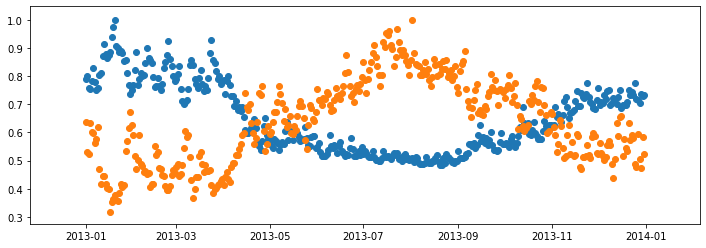

In [62]:
plt.figure(figsize=(12,4))
plt.scatter(pdates, pdailys['sigma']/pdailys['sigma'].max())
plt.scatter(wdates, wdailys['mean']/wdailys['mean'].max())

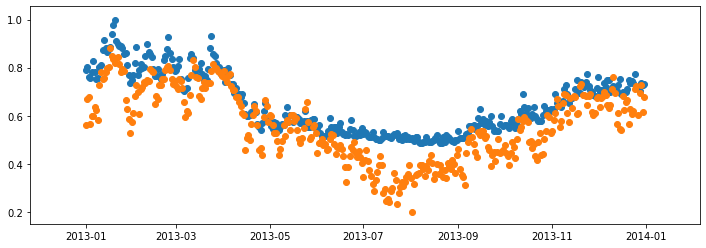

In [66]:
plt.figure(figsize=(12,4))
plt.scatter(pdates, pdailys['sigma']/pdailys['sigma'].max())
plt.scatter(wdates, 1.2-wdailys['mean']/wdailys['mean'].max())